<a href="https://colab.research.google.com/github/CharlyAguirre/ADA-informes/blob/main/OrdenTopologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de orden topológico.

**Entrada**: Grafo dirigido sin ciclos **G=(V,E)**, siendo **V** la cantidad de nodos del grafo y **E** los arcos.

**Salida:** Un orden topológico de los vértices de **G**. Es decir, una asignación **f(v)** a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v) < f(w)$.

Un orden topológico se trata del orden de los nodos que corresponden al grafo **G** tal que cada nodo este primero que sus descendientes, es decir que el primero en entrar al orden topológico es un nodo que no tenga padres/antecesor, por esta propiedad es que no se le puede encontrar un orden topológico a un grafo dirigido con ciclos ya que todos tienes un padre/antecesor.



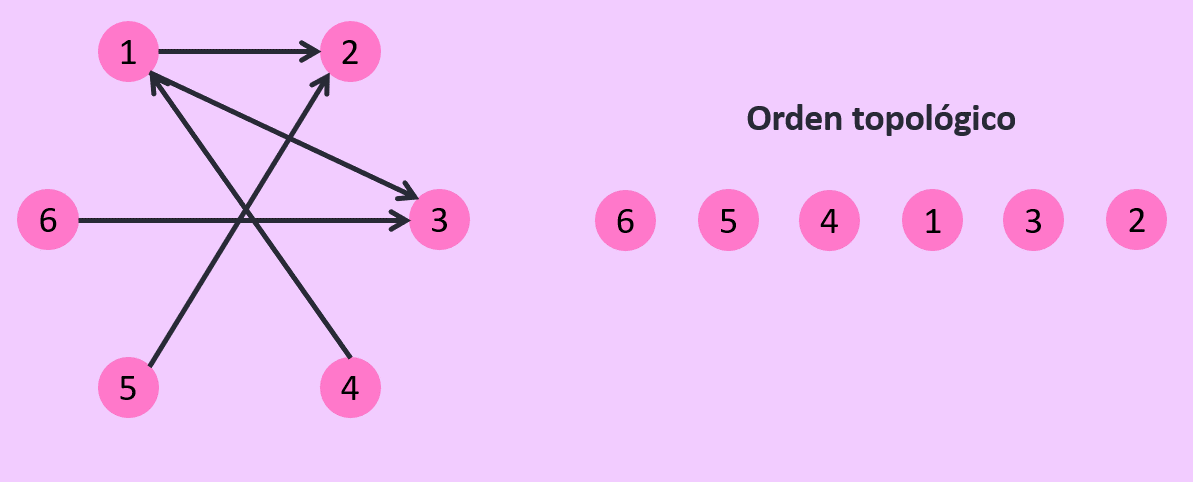

# 2. Ordenamiento topológico.

Para la resolucion del problema de orden topologico se realizaran dos implementaciones para este algortimo, una variante sera iterativo y la otra sera recusiva, pero estas dos varientes seguiran un proceso de DFS (**búsqueda en profundidad**)en postOrden.

Una DFS es un algoritmo de búsqueda para lo cual recorre los nodos de un grafo. Su funcionamiento consiste en ir expandiendo cada uno de los nodos que va localizando, de forma recurrente (desde el nodo padre hacia el nodo hijo). 

## 2.1 Descripción ordenamiento topológico.

El algoritmo empieza creando un dict donde se almacenarán los estados de cada nodo, también crea una lista donde se almacenará el orden topológico.

El paso anterior aplica para las dos variantes.

Luego se empieza un ciclo for el cual recorre todos los nodos perteneciente al grafo que se le ingresa, dentro de este ciclo se toma un nodo y se revisa, para revisarlo se usa un ciclo while que toma por condición el largo de una pila auxiliar, esta pila empieza por largo 1 con el nodo que estamos revisando, ahora revisamos el estado de este nodo por lo que lo sacamos de la pila, si no tiene estado se toma como no descubierto, por lo que se le asigna el estado descubierto y se ingresan sus nodos hijos/sucesores a la pila auxiliar, este proceso se repite hasta que se saca de la pila un nodo que ya tiene el estado de descubierto, si esta descubierto significa que este nodo no tiene hijo/sucesores por lo que es un nodo hoja, si esto pasa se marca como visitado y se ingresa a la lista donde se almacena el orden topológico, este ciclo se repite hasta que se obtiene el orden topológico pero este se encuentra al revés en la lista por lo que se le da vuelta y se retorna esta lista.

Esto para el caso iterativo, para el caso recursivo para revisar los nodos se realiza mediante una función aparte llamada DfsRecur que cumple con las mismas condiciones, solo que cuando tiene un nodo no descubierto se llama a sí mismas sucesivamente hasta llegar a un nodo descubierto, que marca como visitado y lo ingresa a la lista de orden topológico una vez que ingresa un nodo a la lista termina una recursión y se devuelve a la función de la que fue llamada, esto se repite hasta llegar a la función ordenRecursivoDFS donde se da vuelta la lista donde está el orden topológico y se retorna.




##2.2 Ejemplo paso a paso ordenamiento topológico.

Para el ejemplo paso a paso usaremos el grafo que se puede observar en la siguiente imagen.


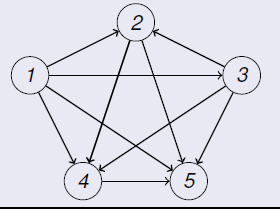

Para el ejemplo paso a paso usaremos el grafo que se puede observar en la siguiente imagen.
El primer paso es identificar un nodo el cual no posea padre/antecesor, en este grafo solo el nodo que cumple con esta condición es el nodo 1 por lo que lo eliminamos y lo agregamos al orden topológico.

OrdenTopo = [1].


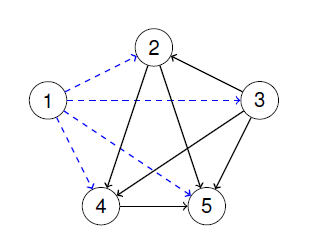

Siguiendo con la propiedad de eliminar el nodo que no tenga padre/antecesor, al eliminar el nodo 1 nos queda el nodo 3 libre de padre/antecesor por lo que es el siguiente en eliminar y agregar al orden topológico.

OrdenTopo = [1,3].


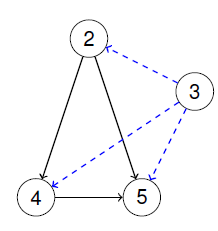

Siguiendo con la propiedad de eliminar el nodo que no tenga padre/antecesor, al eliminar el nodo 3 nos queda el nodo 2 libre de padre/antecesor por lo que es el siguiente en eliminar y agregar al orden topológico.

OrdenTopo = [1,3,2].


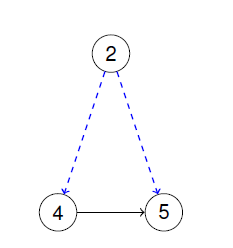

Siguiendo con la propiedad de eliminar el nodo que no tenga padre/antecesor, al eliminar el nodo 2 nos queda el nodo 4 libre de padre/antecesor por lo que es el siguiente en eliminar y agregar al orden topológico.

OrdenTopo = [1,3,2,4].


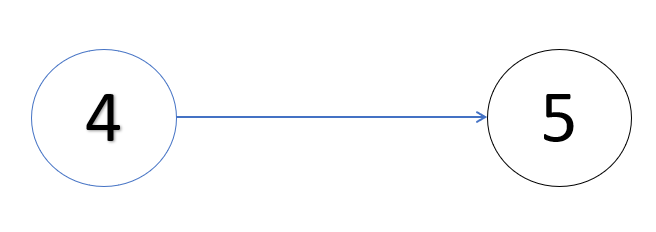

Por último, nos queda el nodo 5 libre por lo que lo agregamos al orden topológico, con esto ya terminamos con todos los nodos del grafo y obtenemos el orden topológico que se encuentra en el siguiente orden --> [1,3,2,4,5]

## 2.3 Código orden topológico.

In [2]:
#@title Generador de instancias, puede generar grafos con ciclos
from collections import defaultdict
import math
import random
import networkx as nx
import matplotlib.pyplot as plt

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph
 

###2.3.1 Variante iterativa

Grafo de entrada


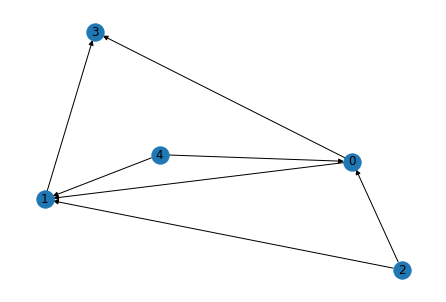

Orden Topologico salida:
[2, 4, 0, 1, 3]


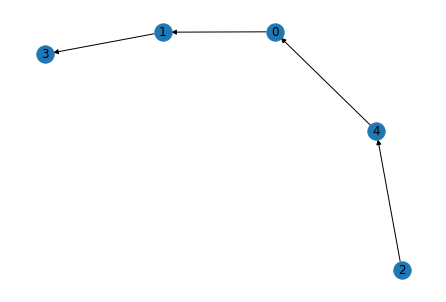

In [8]:
def ordenIterativoDFS(Grafo, verbose = False, visualize = False):

    state = dict() #estados del nodo
    OrdenSalida = []

    #mostrar grafo de entrada
    if visualize == True:
      print("Grafo de entrada")
      nx.draw(Grafo, with_labels=True)
      plt.show()
      plt.close()

    #iteraciones de los nodos del grafo    
    for n in Grafo:
      if verbose: print("Revisando nodo", n)
      S=[n] # se inicializa la pila con el nodod n

      while len(S)>0:
        n=S.pop()

        if verbose == True:
          print("Revisa se el nodo:",n)

        if n not in state: #primera pasada
          if verbose == True: 
            print("Nodo",n,"descubierto, agregando nodos adyacentes a la pila")

          state[n]="descubierto"
          S.append(n)

          for adj in reversed(list(Grafo[n])):
              if adj not in state: 
                S.append(adj)
                    
        elif state[n]=="descubierto": #segunda pasada
            state[n] ="visitado"
                
            OrdenSalida.append(n)

            if verbose == True: 
              print("Nodo",n,"visitado y agregado a la lista") 
              print("Se actualiza la lista")
              print(OrdenSalida)
              print("")
            
        elif verbose == True:
          print("No se realiza nada")


    OrdenSalida.reverse()#por el orden que se van agregando quedan ordenados alrevez

    if verbose == True:
      print("Se da vuela el orde")
      print(OrdenSalida)

    #mostrar orden topo en grafo
    if visualize == True:
      print("Orden Topologico salida:")
      ordenTopo = nx.DiGraph()
      for i in range(len(OrdenSalida)-1):
          ordenTopo.add_edge(OrdenSalida[i], OrdenSalida[i+1])
      nx.draw(ordenTopo, with_labels=True)

    return OrdenSalida


Grafo = graph_to_nxdigraph(graph_instance_creator(5))

print(ordenIterativoDFS(Grafo, verbose = False, visualize = True))

###2.3.2 Variante recursiva.


Grafo de entrada


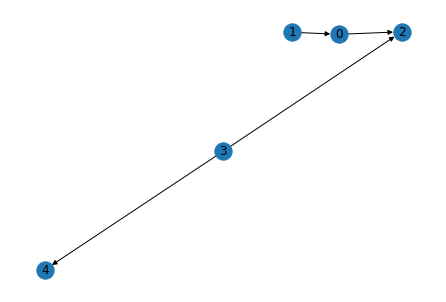

Orden Topologico salida:
[4, 2, 3, 4, 2, 0, 2, 1, 0, 2]


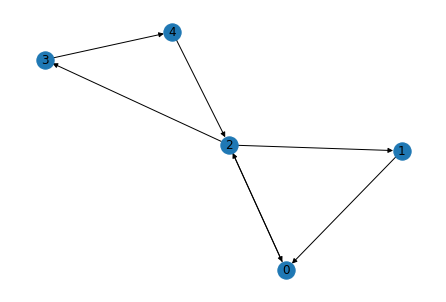

In [12]:
def dfsRecur(nodo,state,OrdenSalida,Grafo,verbose):

  #marca como visitado el nodo 
  state[nodo] = "descubierto"                                                      
                                                                                
  if verbose ==  True:
    print("El nodo",nodo," con los arcos ",list(Grafo.successors(nodo)),"se marca como visitado")


  #se visitan los nodos que estan conectados con el nodo ingresado a la funcion
  for i in list(Grafo.successors(nodo)):                                                                   
    if state[i] == "no descubierto":

      if verbose == True:
        print("Llamamos recursivamente a la funcion dfsRecur para revisar el nodo:", i)

      dfsRecur(i, state, OrdenSalida, Grafo,verbose)


  OrdenSalida.append(nodo)

  if verbose == True:
    print("Se ingresa el nodo",nodo," al stack")
    print(OrdenSalida)
    print("")

def ordenRecursivoDFS(Grafo,verbose = False, visualize = False):
                                                                     
  state = dict() #estados del nodo
  OrdenSalida = [] #orden topologico salida

  if visualize == True:
      print("Grafo de entrada")
      nx.draw(Grafo, with_labels=True)
      plt.show()
      plt.close()                                                                

  #se inicializa cada nodo como no descubierto
  for i in Grafo:
    state[i] = "no descubierto" 

  if verbose == True:
    print("Lista de estados de los nodos")
    print(state)                                             

  #llamada a la funcion dfsRecur
  for i in Grafo:
    if state[i] == "no descubierto":
      dfsRecur(i,state,OrdenSalida,Grafo,verbose)
                                                                           
  OrdenSalida.reverse()#por el orden que se van agregando quedan ordenados alrevez
  if visualize == True:
      print("Orden Topologico salida:")
      ordenTopo = nx.DiGraph()
      for i in range(len(OrdenSalida)-1):
          ordenTopo.add_edge(OrdenSalida[i], OrdenSalida[i+1])
      nx.draw(ordenTopo, with_labels=True)

                                                                
  return OrdenSalida

print(ordenRecursivoDFS(Grafo, verbose = False, visualize = True))                                           


##2.4 Ejecución paso a paso del ordenamiento topológico (verbose = True).

###2.4.1 Orden topológico iterativo.

Grafo de entrada


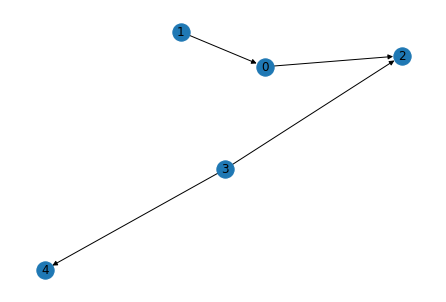

Revisando nodo 1
Revisa se el nodo: 1
Nodo 1 descubierto, agregando nodos adyacentes a la pila
Revisa se el nodo: 0
Nodo 0 descubierto, agregando nodos adyacentes a la pila
Revisa se el nodo: 2
Nodo 2 descubierto, agregando nodos adyacentes a la pila
Revisa se el nodo: 2
Nodo 2 visitado y agregado a la lista
Se actualiza la lista
[2]

Revisa se el nodo: 0
Nodo 0 visitado y agregado a la lista
Se actualiza la lista
[2, 0]

Revisa se el nodo: 1
Nodo 1 visitado y agregado a la lista
Se actualiza la lista
[2, 0, 1]

Revisando nodo 0
Revisa se el nodo: 0
No se realiza nada
Revisando nodo 3
Revisa se el nodo: 3
Nodo 3 descubierto, agregando nodos adyacentes a la pila
Revisa se el nodo: 4
Nodo 4 descubierto, agregando nodos adyacentes a la pila
Revisa se el nodo: 4
Nodo 4 visitado y agregado a la lista
Se actualiza la lista
[2, 0, 1, 4]

Revisa se el nodo: 3
Nodo 3 visitado y agregado a la lista
Se actualiza la lista
[2, 0, 1, 4, 3]

Revisando nodo 2
Revisa se el nodo: 2
No se realiza nada
Re

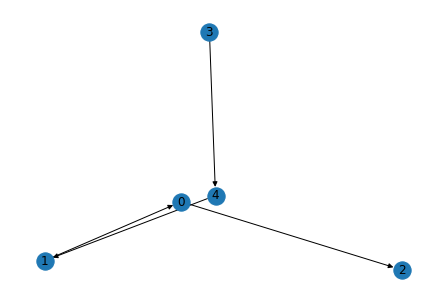

In [9]:
Grafo = graph_to_nxdigraph(graph_instance_creator(5))

print(ordenIterativoDFS(Grafo, verbose = True, visualize = True))

###2.4.2 Orden topológico recursivo.

Grafo de entrada


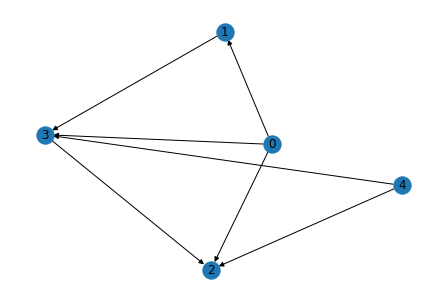

Lista de estados de los nodos
{4: 'no descubierto', 2: 'no descubierto', 3: 'no descubierto', 0: 'no descubierto', 1: 'no descubierto'}
El nodo 4  con los arcos  [2, 3] se marca como visitado
Llamamos recursivamente a la funcion dfsRecur para revisar el nodo: 2
El nodo 2  con los arcos  [] se marca como visitado
Se ingresa el nodo 2  al stack
[2]

Llamamos recursivamente a la funcion dfsRecur para revisar el nodo: 3
El nodo 3  con los arcos  [2] se marca como visitado
Se ingresa el nodo 3  al stack
[2, 3]

Se ingresa el nodo 4  al stack
[2, 3, 4]

El nodo 0  con los arcos  [3, 2, 1] se marca como visitado
Llamamos recursivamente a la funcion dfsRecur para revisar el nodo: 1
El nodo 1  con los arcos  [3] se marca como visitado
Se ingresa el nodo 1  al stack
[2, 3, 4, 1]

Se ingresa el nodo 0  al stack
[2, 3, 4, 1, 0]

Orden Topologico salida:
[0, 1, 4, 3, 2]


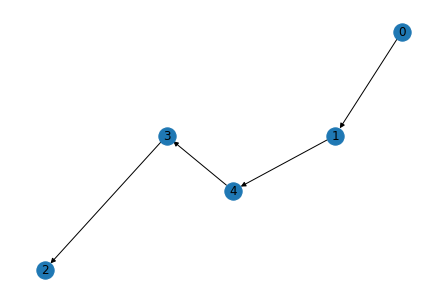

In [6]:
Grafo = graph_to_nxdigraph(graph_instance_creator(5))

print(ordenRecursivoDFS(Grafo, verbose = True, visualize = True))

# 3. Tiempo de ejecución. 

## 3.1 Teorema tiempo de ejecución orden topológico.

El tiempo de ejecución de manera teórica tiene el algoritmo que encuentra un orden topológico de un **grafos con N nodos y E arcos** entre estos nodos en notación **O es de O(N + E)** para todos sus casos.


##3.2 Comprobación del teorema anterior.

El teorema anterior se puede comprobar de la siguiente manera:

El algoritmo tiene un ciclo el cual va desde 0 hasta el número de nodos pertenecientes al grafo ingresado por lo que nos deja la complejidad **O(N)**, también para cada nodo el algoritmo recorre solo una vez los arcos que este posee por lo que nos deja una complejidad **O(E)** 

Si juntamos la primera complejidad obtenida junto con la segunda nos queda que el tiempo de ejecución del algoritmo es **O(N + E)** por lo que el teorema propuesto anteriormente es correcto.


# 4. Correctitud del ordenamiento topológico.

##4.1 Teorema correctitud orden topológico dfs.

El algoritmo para encontrar un orden topológico retorna correctamente un orden topológico para un grafo dirigido sin ciclos con nodos.


##4.2 Comprobación del teorema

Para comprobar el teorema propuesto usaremos la siguiente hipótesis:

Al finalizar el algoritmo, para cualquier arco ***(u,v)*** se cumple que ***f(u) < f(v)***

**Caso base:** (n = 1)

Cuando el grafo que ingresa al algoritmo es de tamaño 1 significa que solo contiene un nodo, por lo que no tiene arcos y la propiedad se cumple trivialmente para el caso base.

**Paso inductivo:** (n > 1)

Cuando n > 1, el algoritmo comienza iterando en un nodo no explorado del grafo. Este nodo es explorado y posteriormente insertado en la pila junto a sus nodos hijos/sucesores, estos nodos son sacados uno a uno de la pila y son marcados como descubiertos.

Cuando se llega a un nodo **N** que no tiene otros nodos hijos/sucesores, lo marcamos como visitado y lo insertamos en la lista de orden topológico. Al proceder con el siguiente nodo en la pila, tenemos 2 posibilidades:

1)El siguiente nodo corresponde a un nodo hermano de **N**. Se ejecutará una búsqueda en profundidad. Diremos que esto es correcto por hipótesis inductiva

2)El siguiente nodo corresponde al padre/antecesor de **N**. Ya que sabemos que el grafo ingresado es dirigido sin ciclos, por lo que cuando tenemos una conexión **(u,v)** siendo la dirección desde el nodo u hasta el nodo v, no existe una conexión en el sentido de v hasta u ya que el grafo ingresado tiene que ser sin ciclos. Esto significa que se cumple que ***f(u) < d(v)*** para cualquier nodo ***d(v) < f(v)***. Al juntar las dos desigualdades obtenemos que ***f(u) < f(v)***

Finalmente, como la hipótesis se cumple para el caso base y para el paso inductivo, queda demostrada la correctitud del algoritmo para encontrar un orden topológico.


# 5. Experimentos

##5.1 comparación de tiempo de ejecución.

En este experimento se comparan los tiempos de ejecución de las dos implementaciones para encontrar un orden topológico


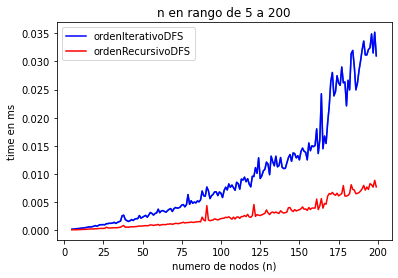

In [7]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y = []
y2 = []

for n in range(5, 200):

  GrafoExperimentos = graph_to_nxdigraph(graph_instance_creator(n))

  t1 = repeat(setup="from __main__ import ordenIterativoDFS", stmt=lambda: ordenIterativoDFS(GrafoExperimentos), repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import ordenRecursivoDFS", stmt=lambda: ordenRecursivoDFS(GrafoExperimentos), repeat = 1, number = 10)

  x.append(n)
  y.append(t1)
  y2.append(t2)

plt.plot(x,y)


plt.plot(x, y, "-b", label="ordenIterativoDFS")
plt.plot(x, y2, "-r", label="ordenRecursivoDFS")

plt.legend(loc="upper left")
plt.title("n en rango de 5 a 200")

plt.xlabel('numero de nodos (n)')
plt.ylabel('time en ms')
plt.show()

###5.1.1 Análisis de resultados
Al observar la gráfica se puede ver con claridad que el algoritmo de ordenRecursivoDFS es más eficiente en términos del tiempo frente al iterativo, esto se puede deber a que el algoritmo iterativo tiende a realizar más comparaciones frente a l recursivo del estado de los nodos lo que podría explicar que aunque teóricamente tengan el mismo tiempo de ejecución (**O(N+E)**) en la practica el recursiva sea mejor.
